In [1]:
from scipy.stats import multivariate_normal
import pandas as pd
import matplotlib.pyplot as plt

import seaborn as sns
import numpy as np

In [2]:
iris_df = sns.load_dataset('iris')

/usr/local/lib/python3.10/dist-packages/seaborn/_base.py:949: FutureWarning: When grouping with a length-1 list-like, you will need to pass a length-1 tuple to get_group in a future version of pandas. Pass `(name,)` instead of `name` to silence this warning.
  data_subset = grouped_data.get_group(pd_key)
/usr/local/lib/python3.10/dist-packages/seaborn/_base.py:949: FutureWarning: When grouping with a length-1 list-like, you will need to pass a length-1 tuple to get_group in a future version of pandas. Pass `(name,)` instead of `name` to silence this warning.
  data_subset = grouped_data.get_group(pd_key)
/usr/local/lib/python3.10/dist-packages/seaborn/_base.py:949: FutureWarning: When grouping with a length-1 list-like, you will need to pass a length-1 tuple to get_group in a future version of pandas. Pass `(name,)` instead of `name` to silence this warning.
  data_subset = grouped_data.get_group(pd_key)
/usr/local/lib/python3.10/dist-packages/seaborn/_base.py:949: FutureWarning: When 

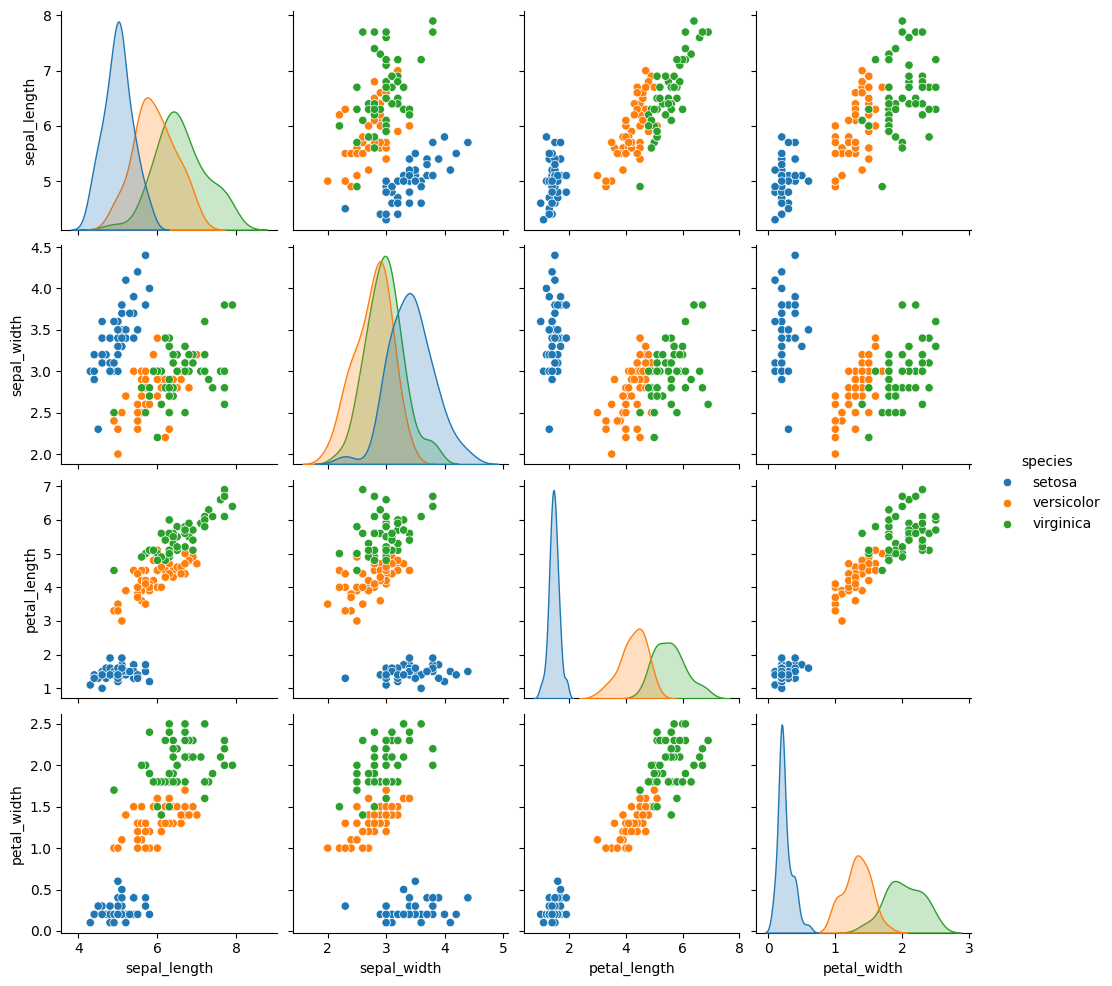

In [3]:
sns.pairplot(
    data=iris_df,
    hue='species'
)

In [4]:
iris_df_scaled = iris_df.copy()
for c in ['sepal_length', 'sepal_width', 'petal_length', 'petal_width']:
    original_column = iris_df[c]
    original_column_minus_mean = original_column - original_column.mean()
    scaled_column =  original_column_minus_mean / original_column.std()
    iris_df_scaled[c] = scaled_column
iris_df_scaled

,sepal_length,sepal_width,petal_length,petal_width,species
0,-0.897674,1.015602,-1.335752,-1.311052,setosa
1,-1.139200,-0.131539,-1.335752,-1.311052,setosa
2,-1.380727,0.327318,-1.392399,-1.311052,setosa
3,-1.501490,0.097889,-1.279104,-1.311052,setosa
4,-1.018437,1.245030,-1.335752,-1.311052,setosa
...,...,...,...,...,...
145,1.034539,-0.131539,0.816859,1.443994,virginica
146,0.551486,-1.278680,0.703564,0.919223,virginica
147,0.793012,-0.131539,0.816859,1.050416,virginica
148,0.430722,0.786174,0.930154,1.443994,virginica


In [5]:
iris_df_scaled = iris_df_scaled[['sepal_length', 'sepal_width', 'petal_length', 'petal_width']]

In [6]:
# Import the PCA class
from sklearn.decomposition import PCA

# Create an instance of the PCA class
pca = PCA()

# Fit the pca instance to the data
pca.fit(iris_df_scaled)

PCA()

In [7]:
pca_scores = pca.transform(iris_df_scaled)
#pca_scores

In [8]:
pca_df = pd.DataFrame(pca_scores)

# Add a new column to the DataFrame which includes the original
pca_df['species']  = iris_df['species']

/usr/local/lib/python3.10/dist-packages/seaborn/_base.py:949: FutureWarning: When grouping with a length-1 list-like, you will need to pass a length-1 tuple to get_group in a future version of pandas. Pass `(name,)` instead of `name` to silence this warning.
  data_subset = grouped_data.get_group(pd_key)
/usr/local/lib/python3.10/dist-packages/seaborn/_base.py:949: FutureWarning: When grouping with a length-1 list-like, you will need to pass a length-1 tuple to get_group in a future version of pandas. Pass `(name,)` instead of `name` to silence this warning.
  data_subset = grouped_data.get_group(pd_key)
/usr/local/lib/python3.10/dist-packages/seaborn/_base.py:949: FutureWarning: When grouping with a length-1 list-like, you will need to pass a length-1 tuple to get_group in a future version of pandas. Pass `(name,)` instead of `name` to silence this warning.
  data_subset = grouped_data.get_group(pd_key)
/usr/local/lib/python3.10/dist-packages/seaborn/_base.py:949: FutureWarning: When 

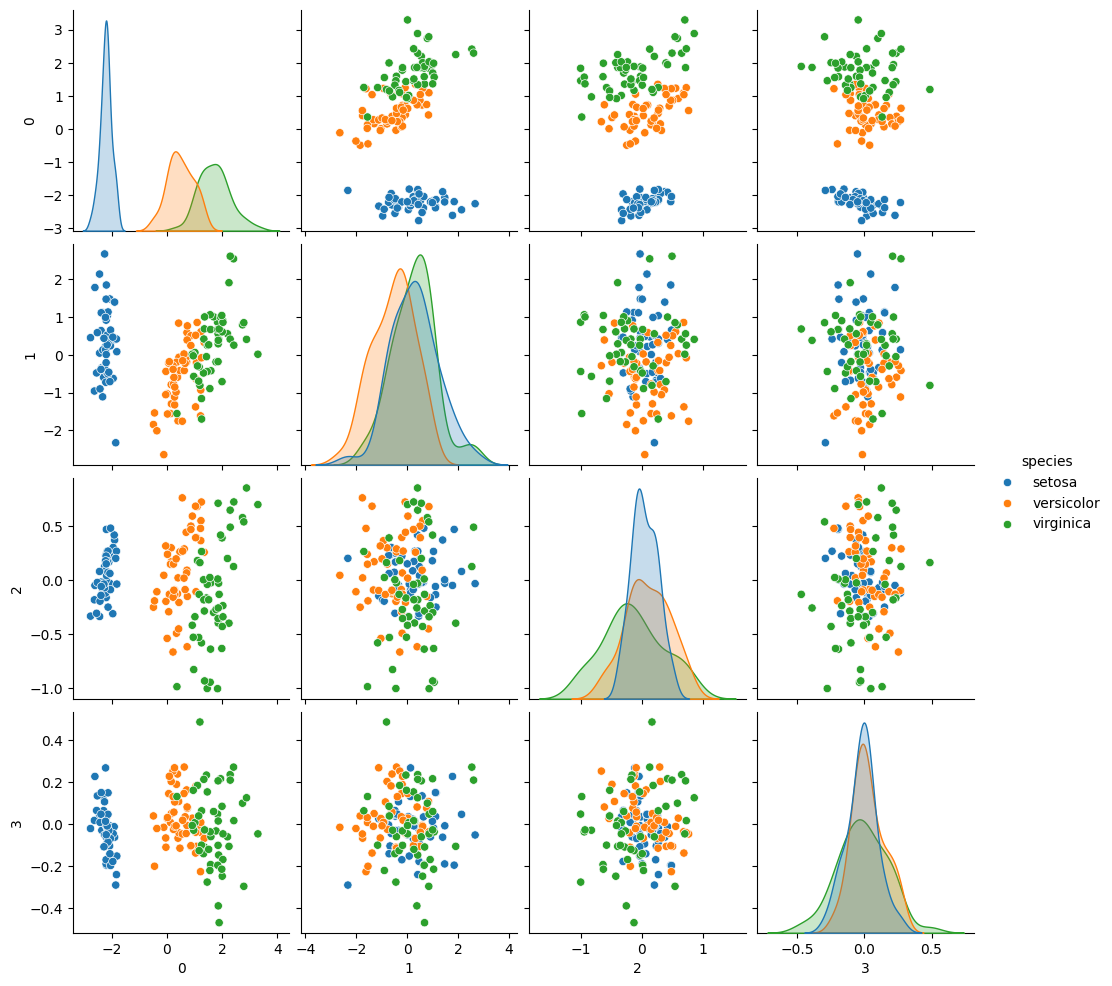

In [9]:
# Produce a pairplot of the transformed data using species as the hue:
sns.pairplot(pca_df, hue='species')